In [1]:
import warnings
warnings.filterwarnings('ignore')

! pip3 install psycopg2-binary

In [2]:
# Импортируем необходимые библиотеки

import pandas as pd
from sqlalchemy import create_engine

In [3]:
# Создадим подключение

path_to_db = '/datasets/telecomm_csi.db' # путь к файлу
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [4]:
# Подготовим предобрабатывающие SQL-запросы и далее посмотрим на вид получившихся таблиц.
# Использовать Python в решении не будем


query = '''        
        SELECT user_id, lt_day, CAST(age AS INT) as age, CAST(gender_segment AS INT) AS gender_segment, 
        CASE
            WHEN os_name = 'IOS' THEN os_name
            WHEN os_name = 'ANDROID' THEN 'Android'
            WHEN os_name = 'PROPRIETARY' THEN 'Proprietary'
            WHEN os_name = 'OTHER' OR os_name = 'unknown' THEN 'Other'
            WHEN os_name = 'WINDOWS PHONE' OR os_name = 'WINDOWS MOBILE' THEN 'Windows Phone'
            WHEN os_name = 'SYMBIAN OS' THEN 'Symbian OS'
            WHEN os_name = 'BADA OS' THEN 'Bada OS'
            ELSE os_name END as os_name,
        CASE
            WHEN cpe_type_name = 'SMARTPHONE' THEN 'Smartphone'
            WHEN cpe_type_name = 'TABLET' THEN 'Tablet'
            WHEN cpe_type_name = 'PHONE' OR cpe_type_name = 'MOBILE PHONE/FEATURE PHONE' THEN 'Feature Phone'
            WHEN cpe_type_name IN ('ROUTER', 'WLAN ROUTER', 'MIFI ROUTER') THEN 'Router'
            WHEN cpe_type_name IN ('USB MODEM', 'MODEM') THEN 'Modem'
            ELSE 'Other' END AS cpe_type_name,
        location_id, age_gr_id, tr_gr_id, lt_gr_id, nps_score
        FROM user
        WHERE age IS NOT NULL OR gender_segment IS NOT NULL;
        '''

user = pd.read_sql(query, engine) 





query = '''
        SELECT location_id, 
        CASE
            WHEN city = 'СанктПетербург' THEN 'Санкт-Петербург'
            WHEN city = 'НижнийНовгород' THEN 'Нижний Новгород'
            WHEN city = 'РостовнаДону' THEN 'Ростов-на-Дону'
            WHEN city = 'НабережныеЧелны' THEN 'Набережные Челны'
            WHEN city = 'УланУдэ' THEN 'Улан-Удэ'
            WHEN city = 'НижнийТагил' THEN 'Нижний Тагил'
            ELSE city END AS city,
        country
        FROM location
        
        '''

location = pd.read_sql(query, engine)




query = '''
        SELECT age_gr_id, 
               CASE 
                   WHEN bucket_max = 15.0 THEN 0
                   ELSE CAST(bucket_min AS INT) END AS bucket_min,
               CASE
                   WHEN bucket_min = 66.0 THEN 150
                   ELSE CAST(bucket_max AS INT) END AS bucket_max,
               TRIM(SUBSTRING(title, 4, 5)) AS title
        FROM age_segment
        WHERE bucket_min IS NOT NULL
        
        '''

age_segment = pd.read_sql(query, engine)



query = '''
        SELECT tr_gr_id, bucket_min, 
        CASE
            WHEN bucket_min = 100.0 THEN 1000.0
            ELSE bucket_max END AS bucket_max,
        TRIM(SUBSTRING(title, 4, 8)) AS title
        FROM traffic_segment
        '''

traffic_segment = pd.read_sql(query, engine)



query = '''
        SELECT lt_gr_id, CAST(bucket_min AS INT) AS bucket_min,
        CASE
            WHEN bucket_min = 36.00 THEN 100
            ELSE CAST(bucket_max AS INT) END AS bucket_max,
        TRIM(SUBSTRING(title, 4, 5)) AS title
        FROM lifetime_segment
        '''

lifetime_segment = pd.read_sql(query, engine)

Далее использование Python происходит исключительно в обзорных целях и оно не принимает участия в решении, что и соответствует условию задачи.

In [5]:
user.head(10)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
0,A001A2,2320,45.0,1.0,Android,Smartphone,55,5,5,8,10
1,A001WF,2344,53.0,0.0,Android,Smartphone,21,5,5,8,10
2,A003Q7,467,57.0,0.0,Android,Smartphone,28,6,9,6,10
3,A004TB,4190,44.0,1.0,IOS,Smartphone,38,4,4,8,10
4,A004XT,1163,24.0,0.0,Android,Smartphone,39,2,6,8,10
5,A005O0,5501,42.0,1.0,Android,Smartphone,34,4,6,8,6
6,A0061R,1236,45.0,0.0,Android,Smartphone,55,5,7,8,10
7,A009KS,313,35.0,0.0,Android,Smartphone,28,4,14,5,10
8,A00AES,3238,36.0,1.0,Android,Smartphone,41,4,5,8,10
9,A00F70,4479,54.0,1.0,Android,Smartphone,9,5,8,8,9


In [6]:
location.head(10)

,location_id,city,country
0,1,Архангельск,Россия
1,2,Астрахань,Россия
2,3,Балашиха,Россия
3,4,Барнаул,Россия
4,5,Белгород,Россия
5,6,Брянск,Россия
6,7,Владивосток,Россия
7,8,Владимир,Россия
8,9,Волгоград,Россия
9,10,Волжский,Россия


In [7]:
age_segment.head(10)

,age_gr_id,bucket_min,bucket_max,title
0,2,16,24,16-24
1,3,25,34,25-34
2,4,35,44,35-44
3,5,45,54,45-54
4,6,55,64,55-64
5,7,66,150,66 +


In [8]:
traffic_segment.head(10)

,tr_gr_id,bucket_min,bucket_max,title
0,1,0.00,0.00,0
1,2,0.00,0.01,0-0.01
2,3,0.01,0.10,0.01-0.1
3,4,0.10,1.00,0.1-1
4,5,1.00,5.00,1-5
5,6,5.00,10.00,5-10
6,7,10.00,15.00,10-15
7,8,15.00,20.00,15-20
8,9,20.00,25.00,20-25
9,10,25.00,30.00,25-30


In [9]:
lifetime_segment.head(10)

,lt_gr_id,bucket_min,bucket_max,title
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,6,4-6
4,5,7,12,7-12
5,6,13,24,13-24
6,7,25,36,25-36
7,8,36,100,36+


In [10]:
query = '''
        SELECT u.user_id, u.lt_day,
        CASE
            WHEN u.lt_day <= 365 THEN TRUE
            ELSE FALSE END AS is_new,
        u.age,
        CASE
            WHEN u.gender_segment = 0 THEN 'M'
            WHEN u.gender_segment = 1 THEN 'F'
            ELSE NULL END AS gender_segment,
        u.os_name, u.cpe_type_name, l.country, l.city, aseg.title AS age_segment, 
        tseg.title AS traffic_segment, lseg.title AS lifetime_segment, u.nps_score,
        CASE
            WHEN u.nps_score <= 6 THEN 'detractors'
            WHEN u.nps_score <= 8 THEN 'passives'
            ELSE 'promoters' END AS nps_group
        
        FROM (
            SELECT user_id, lt_day, CAST(age AS INT) as age, CAST(gender_segment AS INT) AS gender_segment, 
            CASE
                WHEN os_name = 'IOS' THEN os_name
                WHEN os_name = 'ANDROID' THEN 'Android'
                WHEN os_name = 'PROPRIETARY' THEN 'Proprietary'
                WHEN os_name = 'OTHER' OR os_name = 'unknown' THEN 'Other'
                WHEN os_name = 'WINDOWS PHONE' OR os_name = 'WINDOWS MOBILE' THEN 'Windows Phone'
                WHEN os_name = 'SYMBIAN OS' THEN 'Symbian OS'
                WHEN os_name = 'BADA OS' THEN 'Bada OS'
                ELSE os_name END as os_name,
            CASE
                WHEN cpe_type_name = 'SMARTPHONE' THEN 'Smartphone'
                WHEN cpe_type_name = 'TABLET' THEN 'Tablet'
                WHEN cpe_type_name = 'PHONE' OR cpe_type_name = 'MOBILE PHONE/FEATURE PHONE' THEN 'Feature Phone'
                WHEN cpe_type_name IN ('ROUTER', 'WLAN ROUTER', 'MIFI ROUTER') THEN 'Router'
                WHEN cpe_type_name IN ('USB MODEM', 'MODEM') THEN 'Modem'
                ELSE 'Other' END AS cpe_type_name,
            location_id, age_gr_id, tr_gr_id, lt_gr_id, nps_score
            FROM user
            WHERE age IS NOT NULL OR gender_segment IS NOT NULL            
            ) AS u 
            
            INNER JOIN (
                SELECT location_id, 
                CASE
                    WHEN city = 'СанктПетербург' THEN 'Санкт-Петербург'
                    WHEN city = 'НижнийНовгород' THEN 'Нижний Новгород'
                    WHEN city = 'РостовнаДону' THEN 'Ростов-на-Дону'
                    WHEN city = 'НабережныеЧелны' THEN 'Набережные Челны'
                    WHEN city = 'УланУдэ' THEN 'Улан-Удэ'
                    WHEN city = 'НижнийТагил' THEN 'Нижний Тагил'
                    ELSE city END AS city,
                country
                FROM location
            ) AS l ON u.location_id=l.location_id
            
            INNER JOIN (
                SELECT age_gr_id, 
               CASE 
                   WHEN bucket_max = 15.0 THEN 0
                   ELSE CAST(bucket_min AS INT) END AS bucket_min,
               CASE
                   WHEN bucket_min = 66.0 THEN 150
                   ELSE CAST(bucket_max AS INT) END AS bucket_max,
               TRIM(SUBSTRING(title, 4, 5)) AS title
        FROM age_segment
        WHERE bucket_min IS NOT NULL       
            ) AS aseg ON u.age_gr_id=aseg.age_gr_id
            
            INNER JOIN (
            
                SELECT tr_gr_id, bucket_min, 
                CASE
                    WHEN bucket_min = 100.0 THEN 1000.0
                    ELSE bucket_max END AS bucket_max,
                TRIM(SUBSTRING(title, 4, 8)) AS title
                FROM traffic_segment
                 
            ) AS tseg ON u.tr_gr_id=tseg.tr_gr_id
            
            INNER JOIN (
                SELECT lt_gr_id, CAST(bucket_min AS INT) AS bucket_min,
                CASE
                    WHEN bucket_min = 36.00 THEN 100
                    ELSE CAST(bucket_max AS INT) END AS bucket_max,
                TRIM(SUBSTRING(title, 4, 5)) AS title
                FROM lifetime_segment
                
            ) AS lseg ON u.lt_gr_id=lseg.lt_gr_id


        '''

final_df = pd.read_sql(query, engine)

In [11]:
final_df.head(10)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,0,45,F,Android,Smartphone,Россия,Уфа,45-54,1-5,36+,10,promoters
1,A001WF,2344,0,53,M,Android,Smartphone,Россия,Киров,45-54,1-5,36+,10,promoters
2,A003Q7,467,0,57,M,Android,Smartphone,Россия,Москва,55-64,20-25,13-24,10,promoters
3,A004TB,4190,0,44,F,IOS,Smartphone,Россия,Ростов-на-Дону,35-44,0.1-1,36+,10,promoters
4,A004XT,1163,0,24,M,Android,Smartphone,Россия,Рязань,16-24,5-10,36+,10,promoters
5,A005O0,5501,0,42,F,Android,Smartphone,Россия,Омск,35-44,5-10,36+,6,detractors
6,A0061R,1236,0,45,M,Android,Smartphone,Россия,Уфа,45-54,10-15,36+,10,promoters
7,A009KS,313,1,35,M,Android,Smartphone,Россия,Москва,35-44,45-50,7-12,10,promoters
8,A00AES,3238,0,36,F,Android,Smartphone,Россия,Санкт-Петербург,35-44,1-5,36+,10,promoters
9,A00F70,4479,0,54,F,Android,Smartphone,Россия,Волгоград,45-54,15-20,36+,9,promoters


In [12]:
final_df.to_csv('telecom.csv', index=False)

Ссылка на дашборд: https://public.tableau.com/app/profile/dmitriy.ovechkin/viz/NPS-DashVersion1_1/Dashboard2

lifetime_segment                   1     13-24         2     25-36         3  \
gender_segment age_segment                                                     
F              16-24             NaN  0.087361  0.245045  0.019798  0.236111   
               25-34        1.000000  0.214059  0.316308  0.145153  0.359766   
               35-44        0.333333  0.332435  0.450846  0.277917  0.431775   
               45-54        1.000000  0.438341  0.516770  0.360275  0.584877   
               55-64             NaN  0.518766  0.644828  0.475520  0.555066   
               66 +              NaN  0.565394  0.540000  0.559633  0.531915   
M              16-24             NaN  0.059398  0.182390 -0.030520  0.211240   
               25-34        0.000000  0.153785  0.285943  0.087561  0.291468   
               35-44        0.333333  0.308812  0.371588  0.217884  0.400000   
               45-54        1.000000  0.376032  0.536913  0.311503  0.493590   
               55-64        1.000000  0.427167  0.393548  0.392430  0.540146   
               66 +              NaN  0.473451  0.673913  0.387205  0.696970   

lifetime_segment                 36+       4-6      7-12  
gender_segment age_segment                                
F              16-24       -0.065762  0.271100  0.164977  
               25-34        0.027744  0.319668  0.291300  
               35-44        0.175038  0.449479  0.390759  
               45-54        0.300104  0.546698  0.484736  
               55-64        0.417602  0.584660  0.583396  
               66 +         0.536269  0.537143  0.640898  
M              16-24       -0.104258  0.205832  0.186634  
               25-34       -0.042019  0.274569  0.237321  
               35-44        0.100904  0.375661  0.368573  
               45-54        0.223342  0.417763  0.448566  
               55-64        0.334850  0.572482  0.469546  
               66 +         0.437282  0.573913  0.544444

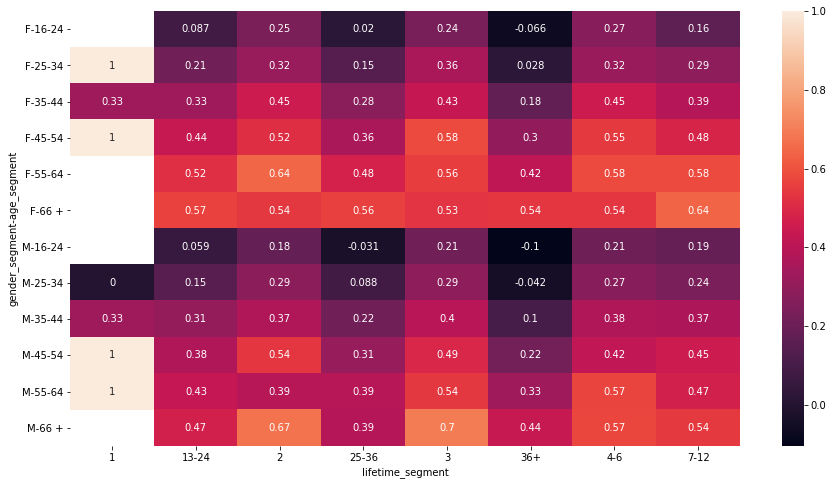

In [18]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = final_df.assign(total_nps=lambda row: row['nps_group'].map({'promoters': 1, 'passives': 0, 'detractors': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

Ссылка на презентацию: https://disk.yandex.ru/i/GthK6_HsmRdW7w